# 使用梯度上升法求解主成分

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
X = np.empty((100, 2))
X[:,0] = np.random.uniform(0.0, 100.0, size=100)
X[:,1] = 0.75 * X[:, 0] + 3.0 + np.random.normal(0, 10.0, size=100)

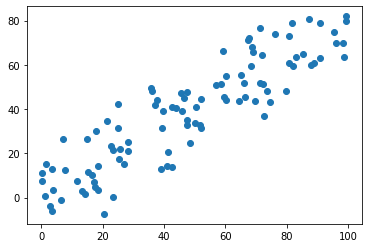

In [17]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [18]:
def demean(X):
    return X - np.mean(X, axis=0)

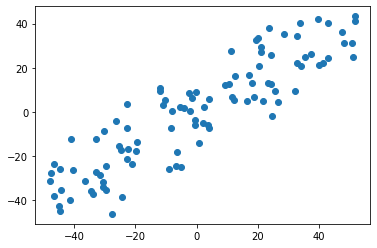

In [19]:
X_demean = demean(X)
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.show()

In [20]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [21]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2.0 / len(X)

In [22]:
def df_debug(w, X, epsilon = 0.0001):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [23]:
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):

    w = direction(initial_w)
    cur_iter = 0

    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)                # 注意1： 每次求一个单位方向
        if (abs(f(w, X) - f(last_w, X)) < epsilon):
            break

        cur_iter += 1

    return w 

In [24]:
initial_w = np.random.random(X.shape[1]) # 注意2： 不能用0向量作为初始系数向量
initial_w


array([0.95291856, 0.90857892])

In [25]:
eta = 0.01

In [26]:
# 注意3： 不能使用StandardScaler标准化数据
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.77190437, 0.63573866])

In [32]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

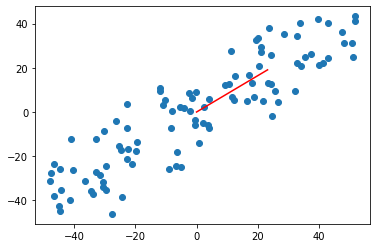

In [34]:
plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0] * 30], [0, w[1] * 30], color='r')
plt.show()

In [35]:
X2 = np.empty((100, 2))
X2[:,0] = np.random.uniform(0.0, 100.0, size=100)
X2[:,1] = 0.75 * X2[:, 0] + 3.0

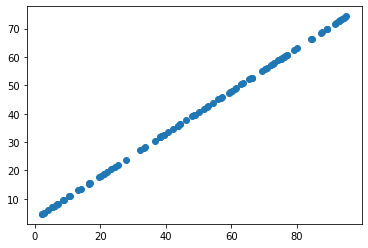

In [36]:
plt.scatter(X2[:, 0], X2[:, 1])
plt.show()

In [37]:
X2_demean = demean(X2)

In [39]:
w2 = gradient_ascent(df_math, X2_demean, initial_w, eta)

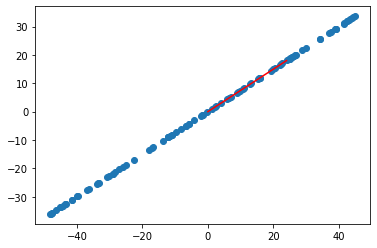

In [40]:
plt.scatter(X2_demean[:, 0], X2_demean[:, 1])
plt.plot([0, w2[0] * 30], [0, w2[1] * 30], color='r')
plt.show()